#Mumbai Housing EDA, House Finder Tool and Price Estimator

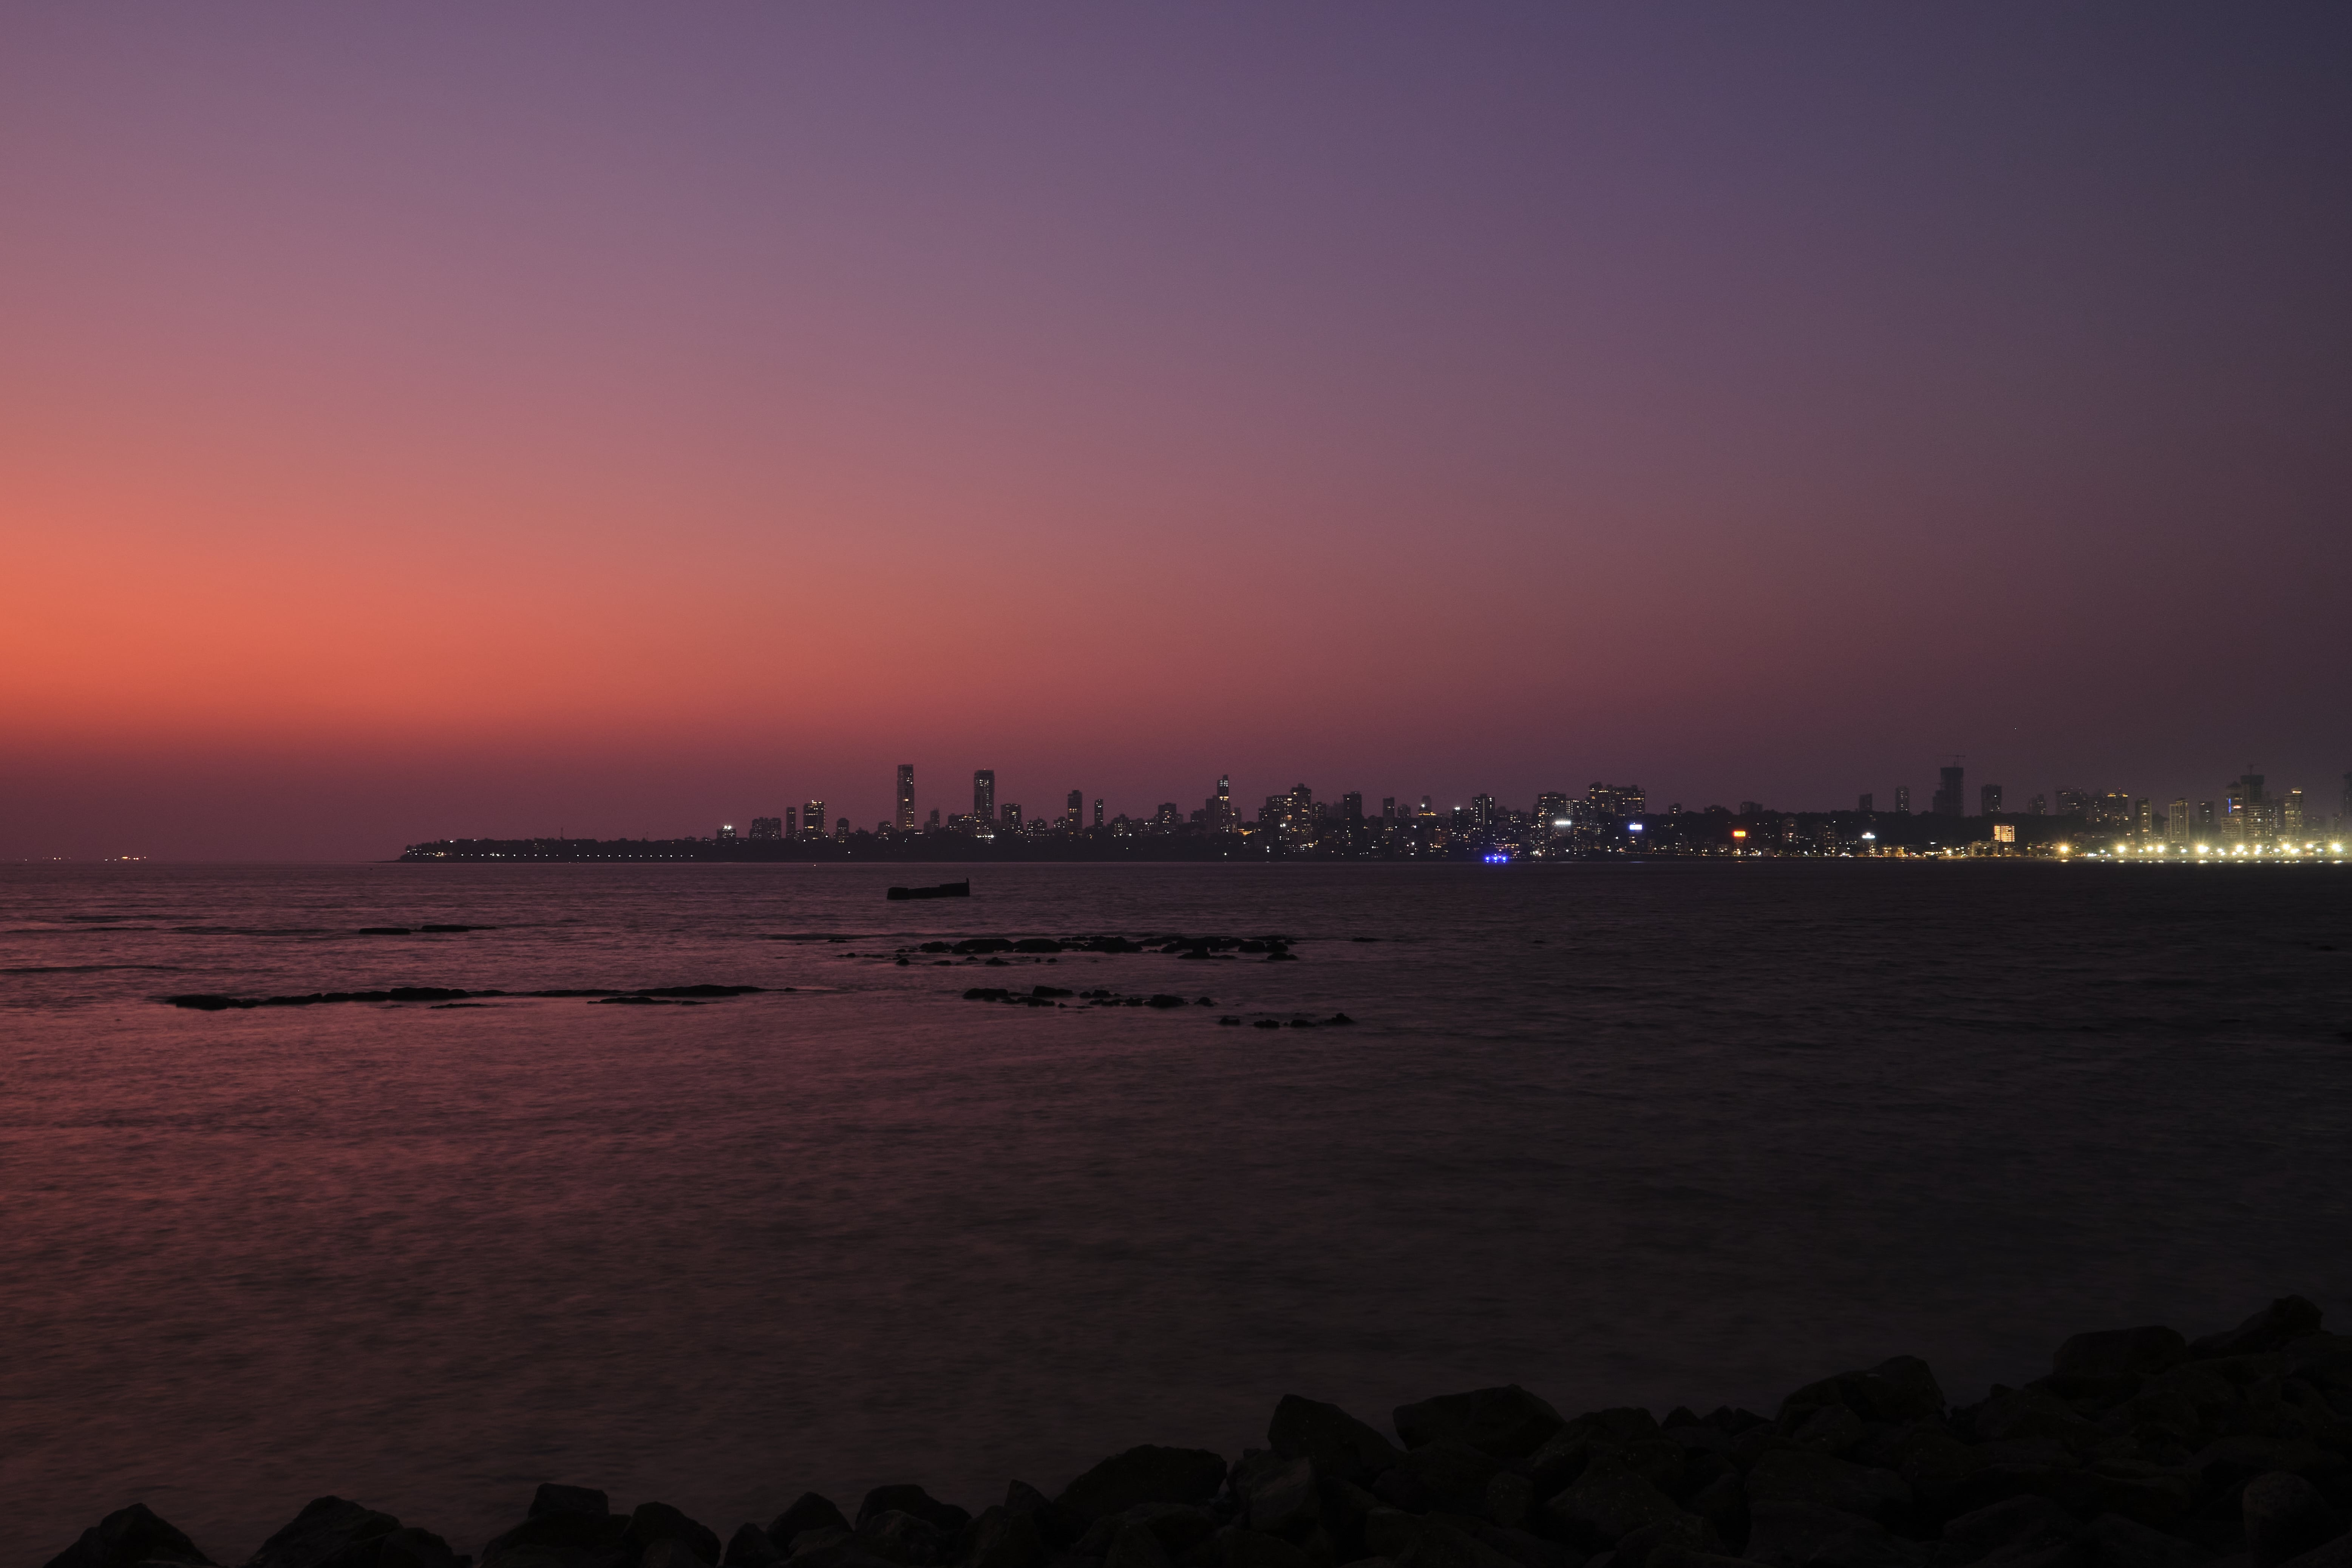

In [ ]:
import pandas as pd       #importing the necessary libraries
import numpy as np 

In [ ]:
df_mumbai=pd.read_excel('/content/Mumbai1.xlsx')   #reading the dataset

In [ ]:
df_mumbai.shape     #dataset shape

(6347, 19)

In [ ]:
df_mumbai.isnull().sum()    #total null values

Unnamed: 0               0
Price                   14
Area                    11
Location                13
No. of Bedrooms          4
New/Resale               0
Gymnasium                3
Lift Available           2
Car Parking              6
Maintenance Staff        4
24x7 Security            6
Children's Play Area     4
Clubhouse               10
Intercom                 7
Landscaped Gardens       4
Indoor Games             2
Gas Connection           2
Jogging Track            1
Swimming Pool            1
dtype: int64

In [ ]:
df_mumbai['Price'].fillna(value=df_mumbai['Price'].mean(),inplace=True)     #Filling missing values in Price by mean

In [ ]:
df_mumbai['Area'].fillna(value=df_mumbai['Area'].mean(),inplace=True)       #Filling missing values in Area by mean

In [ ]:
df_mumbai['No. of Bedrooms'].fillna(value=df_mumbai['No. of Bedrooms'].mode(),inplace=True)     #Filling Number of Bedrooms with mode so that there are no decimal values in Number of Bedrooms

In [ ]:
df_mumbai.dropna(inplace=True)    #Dropping all the remaining null values as filling null values in binary columns would affect our analysis 

In [ ]:
df_mumbai.isnull().sum()     #No missing values

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [ ]:
df_mumbai      #Glimpse of the dataset

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000.0,720.0,Kharghar,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4500000.0,600.0,Kharghar,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,6700000.0,650.0,Kharghar,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,4500000.0,650.0,Kharghar,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4,5000000.0,665.0,Kharghar,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,6341,7000000.0,1020.0,Mira Road East,2.0,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6342,6342,2485000.0,700.0,Shirgaon,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6344,6344,14500000.0,900.0,Thane West,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6345,6345,4100000.0,1380.0,Boisar,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install plotly     #Installing plotly for Data Analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cufflinks      #Installing cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.6 MB/s 


In [ ]:
import cufflinks as cf         #Importing plotly and cufflinks
import plotly 

This graph shows us the correlation between location and price of houses, here we see that areas like Worli and juhu tara have very high prices as compared to the rest of Mumbai while areas like Badlapur and Asangaon have very low prices

In [ ]:
import plotly.express as px           #importing plotly express
house=df_mumbai.groupby('Location')['Price'].mean()       #Grouping by Price with location as index and using mean as an aggregation parameter
fig = px.bar(df_mumbai, x=house.index, y=house.values,title = 'Mumbai Housing Prices',labels={'x':'Locations','y':'Average Price'})      #Bar plot highlighting the house prices in each area
fig.show()

Here we see that Areas like Worli South Mumbai and Juhu Tara have some of the largest plots as well as some of the highest prices. We also see that 2bhk are the most commonly sought after followed by 1 bhk while 7 and 5bhk are the least popular in a city like Mumbai 

In [ ]:
house2=df_mumbai.groupby('Location')['No. of Bedrooms'].mean().round().astype(str)         #Grouping by number of bedrooms and area
house3=df_mumbai.groupby('Location')['Area'].mean()
#Scatter Plot showing the price in various areas with colors indicating the number of bedrooms and the size of bubbles representing the apartment area
fig = px.scatter(df_mumbai, x=house.index, y=house.values,
         size=house3.values,color=house2.values,title = 'Mumbai Housing Prices by Number of Bedrooms and Area',labels={'x':'Locations','y':'Average Price','color':'No. of Bedrooms'})   
fig.show()

The following graph shows the price of every plot per square feet.We can see that places like Juhu Tara,Girgaon and Willingdon have the highest price among all per square feet. We can also conclude that the price per square feet for 1bhk flats is spread out much more uniformly as compared to other cases.

In [ ]:
df_mumbai_vizz=df_mumbai.copy()

In [ ]:
df_mumbai_vizz['Price_per_sqft'] = df_mumbai_vizz['Price']/df_mumbai_vizz['Area']       #Finding price per square feet

In [ ]:
house=df_mumbai_vizz.groupby('Location')['Price_per_sqft'].mean()         #Grouping by Price per square feet as well as other parameters as earlier
house2=df_mumbai_vizz.groupby('Location')['No. of Bedrooms'].mean().round().astype(str)
house3=df_mumbai_vizz.groupby('Location')['Area'].mean()
#Scatter Plot showing the price per square feet in various areas with colors indicating the number of bedrooms and the size of bubbles representing the apartment area
fig = px.scatter(df_mumbai_vizz, x=house.index, y=house.values,
         size=house3.values,color=house2.values,title = 'Mumbai Housing Prices per Square Feet',labels={'x':'Locations','y':'Average Price','color':'No. of Bedrooms'})       
fig.show()

Here we generate a graph to evaluate whether a given plot is actually worth the defined price by taking factors like the total size of the plot and the number of bedrooms.

After analyzing we can conclude that places like Ulhasnagar,Oshiwara Police Station Road and Worli Sea face are the one with some of the highest value for money plots whereas places like Juhu Tara,Willingdon and Off Nepean Sea road might not be the best bang for the buck deal. 

In [ ]:
df_mumbai_vizz['Value_for_money'] = (df_mumbai_vizz['Area']*df_mumbai_vizz['No. of Bedrooms'])/df_mumbai_vizz['Price']      #Creating a new parameter for value of money by multiplying area with number of bedrooms and the dividing the product with price

In [ ]:
house=df_mumbai_vizz.groupby('Location')['Value_for_money'].mean()

In [ ]:
house=df_mumbai_vizz.groupby('Location')['Value_for_money'].mean()            #Grouping by Value for money as well as other parameters as earlier        
house2=df_mumbai_vizz.groupby('Location')['No. of Bedrooms'].mean().round().astype(str)
house3=df_mumbai_vizz.groupby('Location')['Area'].mean()
#Bar Plot showing the Value for Money in various areas with colors indicating the number of bedrooms and the size of bubbles representing the apartment area
fig = px.bar(df_mumbai_vizz, x=house.index, y=house.values,
         color=house2.values,title = 'Mumbai Housing Value For Money (Higher is better)',labels={'x':'Locations','y':'Value For Money','color':'No. of Bedrooms'})
fig.show()

While the above graph included two constraints,that is not the case in this representation.

Here we include multiple choices to select like Car Parking, 24x7 Securiy, Gas Connection, Swimming pool, Jogging track, Maintenance staff, New or Resale, Intercom, Gardens, Gymansium and many more along with previous two constraints to deploy a overall Value for Money representation and we can infer that after including different constraints places like Vitthalwadi, IT Colony, Khopoli, Bhiwandi and Worli Sea Face have some of the best Value for Money Plots whereas places like 15th Road, Malabar hills and Churchgate might not provide the best deals


In [ ]:
df_mumbai_vizz.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool', 'Price_per_sqft',
       'Value_for_money'],
      dtype='object')

In [ ]:
df_vizz=df_mumbai_vizz[df_mumbai_vizz['Location']!='Oshiwara Police Station Road']      #Dropping the outlier

In [ ]:
#Creating new column for value for money including amenities by adding the binary values for all the amenities to original value for money column
df_vizz['Value_for_money_including_amenities']=df_vizz['Value_for_money']*(df_vizz['New/Resale']+df_vizz['Gymnasium']+df_vizz['Lift Available']+df_vizz['Car Parking']+df_vizz['Maintenance Staff']+df_vizz['24x7 Security']+df_vizz["Children's Play Area"]+df_vizz['Clubhouse']+df_vizz['Intercom']+df_vizz['Landscaped Gardens']+df_vizz['Indoor Games']+df_vizz['Gas Connection']+df_vizz['Jogging Track']+df_vizz['Swimming Pool'])

In [ ]:
house=df_vizz.groupby('Location')['Value_for_money_including_amenities'].mean()

In [ ]:
house=df_vizz.groupby('Location')['Value_for_money_including_amenities'].mean()       #Grouping by Value for money including amenities as well as other parameters as earlier
house2=df_vizz.groupby('Location')['No. of Bedrooms'].mean().round().astype(str)
house3=df_vizz.groupby('Location')['Price'].mean()
#Bar Plot showing the value for money including amenities in various areas with colors indicating the number of bedrooms and the size of bubbles representing the apartment area
fig = px.bar(df_vizz, x=house.index, y=house.values,
         color=house2.values,title = 'Mumbai Housing Value For Money Including Amenities(Higher is better)',labels={'x':'Locations','y':'Value For Money Including Amenities','color':'No. of Bedrooms'})
fig.show()

The above graph displayed a summarized scenario taking many constraints into consideration.
But for a person with some specified requirements in mind the following method should be ideal.

Here the person can give an input for Number of bedrooms and Maximum budget and after the input is taken into consideration, a scatter plot is created with constraints set by the user.

For Example, if a person wants a 3bhk plot with a maximum budget 2.5Cr we first give the input and after that we can see a scatter plot is generated showing all the places acceptable by the person.






In [ ]:
nb=int(input('Enter No. of Bedrooms you are looking for'))      #Taking requirements from the user
price=int(input('Enter max budget in lakhs'))*100000
df_new=df_mumbai[df_mumbai['No. of Bedrooms']==nb]       #Filtering the dataset to be plotted as per the user specified requirements
df_new2=df_new[df_new['Price']<price]
house=df_new2.groupby('Location')['Price'].mean()
house2=df_new2.groupby('Location')['No. of Bedrooms'].mean().round().astype(str)
house3=df_new2.groupby('Location')['Area'].mean()
#Plotting all the options the user has with the price, location and Area
fig = px.scatter(df_mumbai, x=house.index, y=house.values,title = 'Mumbai Housing Prices',size=house3.values,color=house3.values,labels={'x':'Locations','y':'Average Price','color':'Area'})
fig.show()

Enter No. of Bedrooms you are looking for3
Enter max budget in lakhs250


Following the previous method, Here the remaning constraints can also be added along withe previous two constraints and a scatter plot is created satisfying all the requests made by the user.

For example, if a person wants a 3bhk flat with a maximum budget of 2.5Cr along with Gym, Lift, Gardens, Indoor Games, Clubhouse and Swimming Pool, the person can simply set the constraints here and after the scatter plot is generated we can see places like Powai, Mulund west and Kandivali have some plots which are closest to the person`s budget while satisfying all the conditions.

In [ ]:
import ipywidgets as widgets

nb=int(input('Enter No. of Bedrooms you are looking for'))
price=int(input('Enter max budget in lakhs'))*100000

#Using Python widgets for taking the input for all the amenities a user wants

print('Select all the amenities you wish to have')

gym = widgets.Checkbox(description="Gym")      #Creating Individual Checkboxes for all amenities
lift = widgets.Checkbox(description="Lift")
car = widgets.Checkbox(description="Car Parking")
security = widgets.Checkbox(description="24*7 Security")
play=widgets.Checkbox(description="Children's Play Area")
clubhouse = widgets.Checkbox(description="Clubhouse")
intercom = widgets.Checkbox(description="Intercom Connection")
garden = widgets.Checkbox(description="Landscape Gardens")
games = widgets.Checkbox(description="Indoor Games")
gas = widgets.Checkbox(description="Gas Connection")
jogging = widgets.Checkbox(description="Jogging Track")
pool = widgets.Checkbox(description="Swimming Pool")

#Creating and styling the Submit Button

pb = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='success', 
    tooltip='Click me',
)

bedrooms=0

#Redirecting the control to the plotting function once the Submit button is clicked

def on_button_clicked(b):
    plot_this([gym.value,lift.value,car.value,security.value,play.value,clubhouse.value,intercom.value,garden.value,games.value,gas.value,jogging.value,pool.value])

pb.on_click(on_button_clicked)      #Python widgets on_click command to detect a click

ui = widgets.VBox([widgets.HBox([gym, lift, car, security, play, clubhouse]), widgets.HBox([intercom, garden, games, gas, jogging, pool]),pb])    

#Creating the onscreen UI and adjusting the alignment of respective checkboxes


display(ui)


#Plot this function filtering the dataset as per user entered requirements and then plotting all available options


def plot_this(l1):

  df_new=df_mumbai[df_mumbai['No. of Bedrooms']==nb]
  df_new2=df_new[df_new['Price']<price]
  df_new3=df_new2[df_new2['Gymnasium']>=l1[0]]
  df_new4=df_new3[df_new3['Lift Available']>=l1[1]]
  df_new5=df_new4[df_new4['Car Parking']>=l1[2]]
  df_new6=df_new5[df_new5['24x7 Security']>=l1[3]]
  df_new7=df_new6[df_new6["Children's Play Area"]>=l1[4]]
  df_new8=df_new7[df_new7['Clubhouse']>=l1[5]]
  df_new9=df_new8[df_new8['Intercom']>=l1[6]]
  df_new10=df_new9[df_new9['Landscaped Gardens']>=l1[7]]
  df_new11=df_new10[df_new10['Indoor Games']>=l1[8]]
  df_new12=df_new11[df_new11['Gas Connection']>=l1[9]]
  df_new13=df_new12[df_new12['Jogging Track']>=l1[10]]
  df_new14=df_new13[df_new13['Swimming Pool']>=l1[11]]

 
  house=df_new14.groupby('Location')['Price'].mean()
  house2=df_new14.groupby('Location')['No. of Bedrooms'].mean().round().astype(str)
  house3=df_new14.groupby('Location')['Area'].mean()
  fig = px.scatter(df_mumbai, x=house.index, y=house.values,title = 'Mumbai Housing Prices',size=house3.values,color=house3.values,labels={'x':'Locations','y':'Average Price','color':'Area'})
  fig.show()

Enter No. of Bedrooms you are looking for3
Enter max budget in lakhs250
Select all the amenities you wish to have


Up until the previous graphs we assumed the user had all the necessary information for choosing a ideal plot but what if the user wants to know a fixed budget while knowing the other constraints.

For that, the following method can be adapted where the user can simply give different inputs like No.of Bedrooms, Size of plot, place and all the other Amenities and after the input is recieved a estimated price is generated.

For example, if a person wants a 3bhk flat in Kharghar with some Amenities and the sie of the plot being 2000 Square feet, the user can set the constraints keeping all these in mind and an estimated budget of 27400000 is generated.

In [ ]:
df_mumbai_ml=df_mumbai.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder         
le=LabelEncoder()
df_mumbai_ml['Location']=le.fit_transform(df_mumbai_ml['Location'])        #Label encoding Location for training the ML Model

In [ ]:
df_mumbai_ml

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000.0,720.0,136,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4500000.0,600.0,136,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,6700000.0,650.0,136,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,4500000.0,650.0,136,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4,5000000.0,665.0,136,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,6341,7000000.0,1020.0,179,2.0,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6342,6342,2485000.0,700.0,319,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6344,6344,14500000.0,900.0,341,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6345,6345,4100000.0,1380.0,36,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df_mumbai_ml.iloc[:,2:].values       #X and y for the ML model to train on
y = df_mumbai_ml.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)        #Splitting data into training data and testing data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)           
regressor.fit(X_train, y_train)        #Fitting the mode

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)      #Making predictions on the testing data

In [ ]:
from sklearn.metrics import r2_score
print("Accuracy:",1-r2_score(y_test, y_pred))      #Finding accuracy using r2 score

Accuracy: 0.625768347036221


In [ ]:
nb=int(input('Enter No. of Bedrooms you are looking for'))
area=int(input("Enter your desired Apartment Size"))
loc=input("Enter what area you are looking for")

#Using Python widgets for taking the input for all the amenities a user wants

print('Select all the amenities you wish to have')

new = widgets.Checkbox(description="Resale")         #Creating Individual Checkboxes for all amenities
gym = widgets.Checkbox(description="Gym")
lift = widgets.Checkbox(description="Lift")
car = widgets.Checkbox(description="Car Parking")
ms = widgets.Checkbox(description="Maintenace Staff")
security = widgets.Checkbox(description="24*7 Security")
play=widgets.Checkbox(description="Children's Play Area")
clubhouse = widgets.Checkbox(description="Clubhouse")
intercom = widgets.Checkbox(description="Intercom Connection")
garden = widgets.Checkbox(description="Landscape Gardens")
games = widgets.Checkbox(description="Indoor Games")
gas = widgets.Checkbox(description="Gas Connection")
jogging = widgets.Checkbox(description="Jogging Track")
pool = widgets.Checkbox(description="Swimming Pool")

#Creating and styling the Submit Button

pb = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='success', 
    tooltip='Click me',
)

bedrooms=0

#Redirecting the control to the prediction function once the Submit button is clicked

def on_button_clicked(b):
   
    predict_this([new.value,gym.value,lift.value,car.value,ms.value,security.value,play.value,clubhouse.value,intercom.value,garden.value,games.value,gas.value,jogging.value,pool.value])

pb.on_click(on_button_clicked)       #Python widgets on_click command to detect a click

ui = widgets.VBox([widgets.HBox([new, gym, lift, car, ms, security, play]), widgets.HBox([clubhouse, intercom, garden, games, gas, jogging, pool]),pb])

#Creating the onscreen UI and adjusting the alignment of respective checkboxes

display(ui)

#Predict this function filtering the dataset as per user entered requirements and then predicting the flat price

def predict_this(l1):

  prediction=regressor.predict([[nb,le.transform([loc]),area]+l1])
  print('Estimated Price of your flat is:',prediction)

Enter No. of Bedrooms you are looking for3
Enter your desired Apartment Size2000
Enter what area you are looking forKharghar
Select all the amenities you wish to have


Estimated Price of your flat is: [27400000.]
